# SUMMARY:

This code runs Monte Carlo simulations for (A.) a number of ETFs by themselves, and (B.) the same ETFs paired with Bitcoin in 50/50 weighted portfolios. 
Note: The ETF simulations by themselves are to serve as a baseline for comparison when the same ETF is combined with Bitcoin.

The historical data used is two years, 2020 and 2021, projecting 1 year in advance.

In [1]:
import pandas as pd
from pathlib import Path
import pandas_datareader.data as reader
import datetime as dt
from MCForecastTools import MCSimulation

# For visualizations:
import seaborn as sns

In [2]:
# Get ticker data

def tickerprices_df(ticker1, start, end):
    ticker_prices = reader.get_data_yahoo(ticker1, start, end)
    display(ticker_prices.head())
    display(ticker_prices.tail())
    return(ticker_prices)

In [3]:
# Arrange columns for MC simulation

def set_columns(ticker_prices):
    ticker_prices.columns = ["adj close", "close", "high", "low", "open", "volume"] #rename columns
    ticker_prices.drop(columns="adj close", axis=1, inplace=True) #drop 'adj close' column
    display(ticker_prices.head())
    return(ticker_prices)

In [4]:
# Concat and format for single ticker MC simulation (100% weight)

def ticker_only_prices(ticker_prices, ticker):
    ticker_only_prices = pd.concat([ticker_prices], axis=1, keys=[ticker])
    display(ticker_only_prices.head())
    return(ticker_only_prices)

In [5]:
# Concat and format for double ticker MC simulation (50%/50% weights)

def concat(df1_prices, df2_prices, first_ticker, sec_ticker):
    prices_combo = pd.concat([df1_prices, df2_prices], axis=1, keys=[first_ticker, sec_ticker])
    prices_combo = prices_combo.dropna()
    display(prices_combo.tail())
    return prices_combo

In [6]:
# Formulate Monte Carlo simulation object for 100% weighted portfolio 

def MC_single_sim(ticker_only):
    MC_ticker = MCSimulation(
        portfolio_data = ticker_only,
        weights = [1],
        num_simulation = 1000,
        num_trading_days = 252)
    display(MC_ticker.portfolio_data.head()) # Review the simulation input data
    return MC_ticker

In [7]:
# Formulate Monte Carlo simulation object for 50/50 weighted portfolio

def MC_combo_sim(combo_df):
    MC_combo = MCSimulation(
        portfolio_data = combo_df,
        weights = [.5, .5],
        num_simulation = 1000,
        num_trading_days = 252)
    display(MC_combo.portfolio_data.head()) # Review the simulation input data
    return MC_combo

In [8]:
# Generate cumulative returns summary tables and print
       
def summary_tables(MC_dict):
    tables = []
    for ticker, MC_obj in MC_dict.items():
        print(f"Cummulative returns summary for {ticker}:")            
        ticker_table = MC_obj.summarize_cumulative_return()
        print(ticker_table)
        tables.append(ticker_table)  
    return(tables)

In [9]:
# Summarize expected returns for single asset portfolio

def summary1(table, investment, ticker):
    
    # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current portfolio
    ci_lower_cumulative_return = round(table[8] * investment, 2)
    ci_upper_cumulative_return = round(table[9] * investment, 2)

    # Print the result of calculations
    print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio with 100% {ticker} over the next"
          f"\nsix months will end within the range of ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

    mean = round(table[1] * investment, 2)
    print(f"\nThe average expected return for {ticker} in 1 year is ${mean}.\n-----")

In [10]:
# Summarize returns for 50/50 weighted portfolio

def summary2(table, investment, tickerA, tickerB):
    
    # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current portfolio
    ci_lower_cumulative_return = round(table[8] * investment, 2)
    ci_upper_cumulative_return = round(table[9] * investment, 2)

    # Print the result of calculations
    print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio with 50% {tickerA} and 50% {tickerB}"
          f"\nin one year will end within the range of ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

    mean = round(table[1] * investment, 2)
    print(f"\nThe average expected return for {tickerA} with {tickerB} in 1 year is ${mean}.\n-----")

# SECTION I: DATA CAPTURE AND ORGANIZATION

In [11]:
# Set start and end dates. Establish ticker symbols.

end = dt.date(2021, 12, 31)
start = dt.date(2020, 1, 1)

ticker1 = ["BTC-USD"]
ticker2 = ["VOT"]  #Vanguard Mid-Cap Growth ETF ETF, a midcap growth fund. Chose midcap to factor out size.
ticker3 = ["IWS"]  #iShares Russell Mid-Cap VALUE ETF, a midcap value fund. Chose midcap to factor out size.
ticker4 = ["MGC"]   #Vanguard Mega Cap ETF, a fund with LARGE CAPS only to feature size (large cap end of the spectrum).
ticker5 = ["EWSC"]  #Invesco S&P SmallCap 600 Equal Weight ETF     

In [12]:
# Get ticker info from Yahoo Finance with tickerprices_df function 

btc_prices = tickerprices_df(ticker1, start, end)

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2020-01-01,7200.174316,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2021-12-28,47588.855469,47588.855469,50679.859375,47414.210938,50679.859375,33430376883
2021-12-29,46444.710938,46444.710938,48119.742188,46201.496094,47623.871094,30049226299
2021-12-30,47178.125000,47178.125000,47879.964844,46060.312500,46490.605469,26686491018
2021-12-31,46306.445312,46306.445312,48472.527344,45819.953125,47169.371094,36974172400
2022-01-01,47686.812500,47686.812500,47827.312500,46288.484375,46311.746094,24582667004


In [13]:
#Format columns for Monte Carlo compatibility

btc_prices = set_columns(btc_prices)

,close,high,low,open,volume
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [14]:
#Get a dataframe for ticker that will only be used by istelf for a 100% ticker-weighted Monte Carlo

btc_only_prices = ticker_only_prices(btc_prices, "BTC-USD")

BTC-USD                                                    
                  close         high          low         open       volume
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095

In [15]:
# Get ticker info from Yahoo Finance with tickerprices_df function 

vot_prices = tickerprices_df(ticker2, start, end)

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,VOT,VOT,VOT,VOT,VOT,VOT
Date,,,,,,
2020-01-02,158.127548,160.039993,160.039993,158.880005,159.770004,259200.0
2020-01-03,157.870682,159.779999,159.960007,157.789993,158.199997,134400.0
2020-01-06,158.315277,160.229996,160.270004,158.550003,158.669998,148600.0
2020-01-07,158.423965,160.339996,160.710007,159.800003,160.149994,99100.0
2020-01-08,158.967392,160.889999,161.660004,160.369995,160.369995,182900.0


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,VOT,VOT,VOT,VOT,VOT,VOT
Date,,,,,,
2021-12-27,256.403351,256.760010,256.890015,253.809998,254.259995,96600.0
2021-12-28,254.216385,254.570007,257.649994,254.360001,257.510010,90700.0
2021-12-29,254.885452,255.240005,255.690002,253.710007,255.169998,114200.0
2021-12-30,255.035248,255.389999,257.519989,255.309998,255.990005,282100.0
2021-12-31,254.266312,254.619995,256.079987,254.539993,255.220001,189500.0


In [16]:
#Format columns for Monte Carlo compatibility

vot_prices = set_columns(vot_prices)

,close,high,low,open,volume
Date,,,,,
2020-01-02,160.039993,160.039993,158.880005,159.770004,259200.0
2020-01-03,159.779999,159.960007,157.789993,158.199997,134400.0
2020-01-06,160.229996,160.270004,158.550003,158.669998,148600.0
2020-01-07,160.339996,160.710007,159.800003,160.149994,99100.0
2020-01-08,160.889999,161.660004,160.369995,160.369995,182900.0


In [17]:
#Get a dataframe for ticker that will only be used by istelf for a 100% ticker-weighted Monte Carlo

vot_only_prices = ticker_only_prices(vot_prices, "VOT")

VOT                                              
                 close        high         low        open    volume
Date                                                                
2020-01-02  160.039993  160.039993  158.880005  159.770004  259200.0
2020-01-03  159.779999  159.960007  157.789993  158.199997  134400.0
2020-01-06  160.229996  160.270004  158.550003  158.669998  148600.0
2020-01-07  160.339996  160.710007  159.800003  160.149994   99100.0
2020-01-08  160.889999  161.660004  160.369995  160.369995  182900.0

In [18]:
# Get ticker info from Yahoo Finance with tickerprices_df function 

iws_prices = tickerprices_df(ticker3, start, end)

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,IWS,IWS,IWS,IWS,IWS,IWS
Date,,,,,,
2020-01-02,90.591805,94.570000,95.209999,94.019997,95.160004,557000.0
2020-01-03,90.266121,94.230003,94.389999,93.650002,93.879997,443700.0
2020-01-06,90.294853,94.260002,94.269997,93.680000,93.830002,664600.0
2020-01-07,90.122437,94.080002,94.279999,93.839996,94.099998,358100.0
2020-01-08,90.160744,94.120003,94.480003,93.889999,94.169998,386400.0


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,IWS,IWS,IWS,IWS,IWS,IWS
Date,,,,,,
2021-12-27,121.253708,121.720001,121.720001,119.949997,120.190002,638000.0
2021-12-28,121.522675,121.989998,122.419998,121.639999,121.699997,392500.0
2021-12-29,121.921143,122.389999,122.500000,121.699997,122.080002,287700.0
2021-12-30,121.721909,122.190002,123.040001,122.080002,122.389999,241200.0
2021-12-31,121.911179,122.379997,122.900002,121.940002,122.070000,299400.0


In [19]:
#Format columns for Monte Carlo compatibility

iws_prices = set_columns(iws_prices)

,close,high,low,open,volume
Date,,,,,
2020-01-02,94.570000,95.209999,94.019997,95.160004,557000.0
2020-01-03,94.230003,94.389999,93.650002,93.879997,443700.0
2020-01-06,94.260002,94.269997,93.680000,93.830002,664600.0
2020-01-07,94.080002,94.279999,93.839996,94.099998,358100.0
2020-01-08,94.120003,94.480003,93.889999,94.169998,386400.0


In [20]:
#Get a dataframe for ticker that will only be used by istelf for a 100% ticker-weighted Monte Carlo

iws_only_prices = ticker_only_prices(iws_prices, "IWS")

IWS                                           
                close       high        low       open    volume
Date                                                            
2020-01-02  94.570000  95.209999  94.019997  95.160004  557000.0
2020-01-03  94.230003  94.389999  93.650002  93.879997  443700.0
2020-01-06  94.260002  94.269997  93.680000  93.830002  664600.0
2020-01-07  94.080002  94.279999  93.839996  94.099998  358100.0
2020-01-08  94.120003  94.480003  93.889999  94.169998  386400.0

In [21]:
# Get ticker info from Yahoo Finance with tickerprices_df function 

mgc_prices = tickerprices_df(ticker4, start, end)

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,MGC,MGC,MGC,MGC,MGC,MGC
Date,,,,,,
2020-01-02,109.172379,112.889999,112.889999,112.110001,112.379997,135600.0
2020-01-03,108.379379,112.070000,112.489998,111.529999,111.750000,69200.0
2020-01-06,108.833893,112.540001,112.550003,111.199997,111.379997,192200.0
2020-01-07,108.524445,112.220001,112.449997,112.099998,112.410004,75000.0
2020-01-08,109.143364,112.860001,113.300003,112.180000,112.180000,113600.0


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,MGC,MGC,MGC,MGC,MGC,MGC
Date,,,,,,
2021-12-27,168.716751,169.229996,169.259995,167.470001,167.470001,59400.0
2021-12-28,168.487457,169.000000,169.679993,168.770004,169.410004,70500.0
2021-12-29,168.646973,169.160004,169.470001,168.619995,169.100006,86800.0
2021-12-30,168.198349,168.710007,169.710007,168.550003,169.160004,67100.0
2021-12-31,167.570251,168.080002,168.889999,168.029999,168.500000,57000.0


In [22]:
#Format columns for Monte Carlo compatibility

mgc_prices = set_columns(mgc_prices)

,close,high,low,open,volume
Date,,,,,
2020-01-02,112.889999,112.889999,112.110001,112.379997,135600.0
2020-01-03,112.070000,112.489998,111.529999,111.750000,69200.0
2020-01-06,112.540001,112.550003,111.199997,111.379997,192200.0
2020-01-07,112.220001,112.449997,112.099998,112.410004,75000.0
2020-01-08,112.860001,113.300003,112.180000,112.180000,113600.0


In [23]:
#Get a dataframe for ticker that will only be used by istelf for a 100% ticker-weighted Monte Carlo

mgc_only_prices = ticker_only_prices(mgc_prices, "MGC")

MGC                                              
                 close        high         low        open    volume
Date                                                                
2020-01-02  112.889999  112.889999  112.110001  112.379997  135600.0
2020-01-03  112.070000  112.489998  111.529999  111.750000   69200.0
2020-01-06  112.540001  112.550003  111.199997  111.379997  192200.0
2020-01-07  112.220001  112.449997  112.099998  112.410004   75000.0
2020-01-08  112.860001  113.300003  112.180000  112.180000  113600.0

In [24]:
# Get ticker info from Yahoo Finance with tickerprices_df function 

ewsc_prices = tickerprices_df(ticker5, start, end)

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,EWSC,EWSC,EWSC,EWSC,EWSC,EWSC
Date,,,,,,
2020-01-02,55.771477,56.820000,57.040001,56.410000,57.040001,1600.0
2020-01-03,55.781292,56.830002,56.830002,56.529999,56.529999,1700.0
2020-01-06,55.938343,56.990002,56.990002,56.540001,56.560001,1900.0
2020-01-07,55.565353,56.610001,56.709999,56.430000,56.709999,4300.0
2020-01-08,55.477013,56.520000,56.570000,56.450001,56.500000,600.0


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,EWSC,EWSC,EWSC,EWSC,EWSC,EWSC
Date,,,,,,
2021-12-27,84.214317,84.459999,84.480003,83.519997,83.519997,4200.0
2021-12-28,84.164467,84.410004,85.389999,84.410004,85.290001,4800.0
2021-12-29,84.234268,84.480003,84.889999,84.389999,84.889999,5800.0
2021-12-30,84.054787,84.300003,85.019997,84.300003,84.839996,2300.0
2021-12-31,84.104637,84.349998,84.599998,84.129997,84.599998,1600.0


In [25]:
#Format columns for Monte Carlo compatibility

ewsc_prices = set_columns(ewsc_prices)

,close,high,low,open,volume
Date,,,,,
2020-01-02,56.820000,57.040001,56.410000,57.040001,1600.0
2020-01-03,56.830002,56.830002,56.529999,56.529999,1700.0
2020-01-06,56.990002,56.990002,56.540001,56.560001,1900.0
2020-01-07,56.610001,56.709999,56.430000,56.709999,4300.0
2020-01-08,56.520000,56.570000,56.450001,56.500000,600.0


In [26]:
#Get a dataframe for ticker that will only be used by istelf for a 100% ticker-weighted Monte Carlo

ewsc_only_prices = ticker_only_prices(ewsc_prices, "EWSC")

EWSC                                         
                close       high        low       open  volume
Date                                                          
2020-01-02  56.820000  57.040001  56.410000  57.040001  1600.0
2020-01-03  56.830002  56.830002  56.529999  56.529999  1700.0
2020-01-06  56.990002  56.990002  56.540001  56.560001  1900.0
2020-01-07  56.610001  56.709999  56.430000  56.709999  4300.0
2020-01-08  56.520000  56.570000  56.450001  56.500000   600.0

In [27]:
# Concatenate the ticker DataFrames

prices_btc_vot = concat(btc_prices, vot_prices, "BTC-USD", "VOT")
prices_btc_iws = concat(btc_prices, iws_prices, "BTC-USD", "IWS")
prices_btc_mgc = concat(btc_prices, mgc_prices, "BTC-USD", "MGC")
prices_btc_ewsc = concat(btc_prices, ewsc_prices, "BTC-USD", "EWSC")

BTC-USD                                            \
                   close          high           low          open   
Date                                                                 
2021-12-27  50640.417969  51956.328125  50499.468750  50802.609375   
2021-12-28  47588.855469  50679.859375  47414.210938  50679.859375   
2021-12-29  46444.710938  48119.742188  46201.496094  47623.871094   
2021-12-30  47178.125000  47879.964844  46060.312500  46490.605469   
2021-12-31  46306.445312  48472.527344  45819.953125  47169.371094   

                                VOT                                      \
                 volume       close        high         low        open   
Date                                                                      
2021-12-27  24324345758  256.760010  256.890015  253.809998  254.259995   
2021-12-28  33430376883  254.570007  257.649994  254.360001  257.510010   
2021-12-29  30049226299  255.240005  255.690002  253.710007  255.169998   
2021-12-30  26686491018  255.389999  257.519989  255.309998  255.990005   
2021-12-31  36974172400  254.619995  256.079987  254.539993  255.220001   

                      
              volume  
Date                  
2021-12-27   96600.0  
2021-12-28   90700.0  
2021-12-29  114200.0  
2021-12-30  282100.0  
2021-12-31  189500.0

BTC-USD                                            \
                   close          high           low          open   
Date                                                                 
2021-12-27  50640.417969  51956.328125  50499.468750  50802.609375   
2021-12-28  47588.855469  50679.859375  47414.210938  50679.859375   
2021-12-29  46444.710938  48119.742188  46201.496094  47623.871094   
2021-12-30  47178.125000  47879.964844  46060.312500  46490.605469   
2021-12-31  46306.445312  48472.527344  45819.953125  47169.371094   

                                IWS                                      \
                 volume       close        high         low        open   
Date                                                                      
2021-12-27  24324345758  121.720001  121.720001  119.949997  120.190002   
2021-12-28  33430376883  121.989998  122.419998  121.639999  121.699997   
2021-12-29  30049226299  122.389999  122.500000  121.699997  122.080002   
2021-12-30  26686491018  122.190002  123.040001  122.080002  122.389999   
2021-12-31  36974172400  122.379997  122.900002  121.940002  122.070000   

                      
              volume  
Date                  
2021-12-27  638000.0  
2021-12-28  392500.0  
2021-12-29  287700.0  
2021-12-30  241200.0  
2021-12-31  299400.0

BTC-USD                                            \
                   close          high           low          open   
Date                                                                 
2021-12-27  50640.417969  51956.328125  50499.468750  50802.609375   
2021-12-28  47588.855469  50679.859375  47414.210938  50679.859375   
2021-12-29  46444.710938  48119.742188  46201.496094  47623.871094   
2021-12-30  47178.125000  47879.964844  46060.312500  46490.605469   
2021-12-31  46306.445312  48472.527344  45819.953125  47169.371094   

                                MGC                                      \
                 volume       close        high         low        open   
Date                                                                      
2021-12-27  24324345758  169.229996  169.259995  167.470001  167.470001   
2021-12-28  33430376883  169.000000  169.679993  168.770004  169.410004   
2021-12-29  30049226299  169.160004  169.470001  168.619995  169.100006   
2021-12-30  26686491018  168.710007  169.710007  168.550003  169.160004   
2021-12-31  36974172400  168.080002  168.889999  168.029999  168.500000   

                     
             volume  
Date                 
2021-12-27  59400.0  
2021-12-28  70500.0  
2021-12-29  86800.0  
2021-12-30  67100.0  
2021-12-31  57000.0

BTC-USD                                            \
                   close          high           low          open   
Date                                                                 
2021-12-27  50640.417969  51956.328125  50499.468750  50802.609375   
2021-12-28  47588.855469  50679.859375  47414.210938  50679.859375   
2021-12-29  46444.710938  48119.742188  46201.496094  47623.871094   
2021-12-30  47178.125000  47879.964844  46060.312500  46490.605469   
2021-12-31  46306.445312  48472.527344  45819.953125  47169.371094   

                              EWSC                                           
                 volume      close       high        low       open  volume  
Date                                                                         
2021-12-27  24324345758  84.459999  84.480003  83.519997  83.519997  4200.0  
2021-12-28  33430376883  84.410004  85.389999  84.410004  85.290001  4800.0  
2021-12-29  30049226299  84.480003  84.889999  84.389999  84.889999  5800.0  
2021-12-30  26686491018  84.300003  85.019997  84.300003  84.839996  2300.0  
2021-12-31  36974172400  84.349998  84.599998  84.129997  84.599998  1600.0

# SECTION II: MONTE CARLOS 

In [28]:
# Get MC simulation object 

MC_vot = MC_single_sim(vot_only_prices)

VOT                                                \
                 close        high         low        open    volume   
Date                                                                   
2020-01-02  160.039993  160.039993  158.880005  159.770004  259200.0   
2020-01-03  159.779999  159.960007  157.789993  158.199997  134400.0   
2020-01-06  160.229996  160.270004  158.550003  158.669998  148600.0   
2020-01-07  160.339996  160.710007  159.800003  160.149994   99100.0   
2020-01-08  160.889999  161.660004  160.369995  160.369995  182900.0   

                         
           daily_return  
Date                     
2020-01-02          NaN  
2020-01-03    -0.001625  
2020-01-06     0.002816  
2020-01-07     0.000687  
2020-01-08     0.003430

In [29]:
# Get MC simulation object 

MC_iws = MC_single_sim(iws_only_prices)

IWS                                                        
                close       high        low       open    volume daily_return
Date                                                                         
2020-01-02  94.570000  95.209999  94.019997  95.160004  557000.0          NaN
2020-01-03  94.230003  94.389999  93.650002  93.879997  443700.0    -0.003595
2020-01-06  94.260002  94.269997  93.680000  93.830002  664600.0     0.000318
2020-01-07  94.080002  94.279999  93.839996  94.099998  358100.0    -0.001910
2020-01-08  94.120003  94.480003  93.889999  94.169998  386400.0     0.000425

In [30]:
# Get MC simulation object 

MC_mgc = MC_single_sim(mgc_only_prices)

MGC                                                \
                 close        high         low        open    volume   
Date                                                                   
2020-01-02  112.889999  112.889999  112.110001  112.379997  135600.0   
2020-01-03  112.070000  112.489998  111.529999  111.750000   69200.0   
2020-01-06  112.540001  112.550003  111.199997  111.379997  192200.0   
2020-01-07  112.220001  112.449997  112.099998  112.410004   75000.0   
2020-01-08  112.860001  113.300003  112.180000  112.180000  113600.0   

                         
           daily_return  
Date                     
2020-01-02          NaN  
2020-01-03    -0.007264  
2020-01-06     0.004194  
2020-01-07    -0.002843  
2020-01-08     0.005703

In [31]:
# Get MC simulation object 

MC_ewsc = MC_single_sim(ewsc_only_prices)

EWSC                                                      
                close       high        low       open  volume daily_return
Date                                                                       
2020-01-02  56.820000  57.040001  56.410000  57.040001  1600.0          NaN
2020-01-03  56.830002  56.830002  56.529999  56.529999  1700.0     0.000176
2020-01-06  56.990002  56.990002  56.540001  56.560001  1900.0     0.002815
2020-01-07  56.610001  56.709999  56.430000  56.709999  4300.0    -0.006668
2020-01-08  56.520000  56.570000  56.450001  56.500000   600.0    -0.001590

In [32]:
# Get MC simulation object for BTC and VOT

MC_btc_vot = MC_combo_sim(prices_btc_vot)

BTC-USD                                                      \
                  close         high          low         open       volume   
Date                                                                          
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465   
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032   
2020-01-06  7769.219238  7781.867188  7409.292969  7410.452148  23276261598   
2020-01-07  8163.692383  8178.215820  7768.227539  7768.682129  28767291327   
2020-01-08  8079.862793  8396.738281  7956.774414  8161.935547  31672559265   

                                VOT                                      \
           daily_return       close        high         low        open   
Date                                                                      
2020-01-02          NaN  160.039993  160.039993  158.880005  159.770004   
2020-01-03     0.051452  159.779999  159.960007  157.789993  158.199997   
2020-01-06     0.057773  160.229996  160.270004  158.550003  158.669998   
2020-01-07     0.050774  160.339996  160.710007  159.800003  160.149994   
2020-01-08    -0.010269  160.889999  161.660004  160.369995  160.369995   

                                   
              volume daily_return  
Date                               
2020-01-02  259200.0          NaN  
2020-01-03  134400.0    -0.001625  
2020-01-06  148600.0     0.002816  
2020-01-07   99100.0     0.000687  
2020-01-08  182900.0     0.003430

In [33]:
# Get MC simulation object for IWS and BTC

MC_btc_iws = MC_combo_sim(prices_btc_iws)

BTC-USD                                                      \
                  close         high          low         open       volume   
Date                                                                          
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465   
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032   
2020-01-06  7769.219238  7781.867188  7409.292969  7410.452148  23276261598   
2020-01-07  8163.692383  8178.215820  7768.227539  7768.682129  28767291327   
2020-01-08  8079.862793  8396.738281  7956.774414  8161.935547  31672559265   

                               IWS                                             \
           daily_return      close       high        low       open    volume   
Date                                                                            
2020-01-02          NaN  94.570000  95.209999  94.019997  95.160004  557000.0   
2020-01-03     0.051452  94.230003  94.389999  93.650002  93.879997  443700.0   
2020-01-06     0.057773  94.260002  94.269997  93.680000  93.830002  664600.0   
2020-01-07     0.050774  94.080002  94.279999  93.839996  94.099998  358100.0   
2020-01-08    -0.010269  94.120003  94.480003  93.889999  94.169998  386400.0   

                         
           daily_return  
Date                     
2020-01-02          NaN  
2020-01-03    -0.003595  
2020-01-06     0.000318  
2020-01-07    -0.001910  
2020-01-08     0.000425

In [34]:
# Get MC simulation object for MGC and BTC

MC_btc_mgc = MC_combo_sim(prices_btc_mgc)

BTC-USD                                                      \
                  close         high          low         open       volume   
Date                                                                          
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465   
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032   
2020-01-06  7769.219238  7781.867188  7409.292969  7410.452148  23276261598   
2020-01-07  8163.692383  8178.215820  7768.227539  7768.682129  28767291327   
2020-01-08  8079.862793  8396.738281  7956.774414  8161.935547  31672559265   

                                MGC                                      \
           daily_return       close        high         low        open   
Date                                                                      
2020-01-02          NaN  112.889999  112.889999  112.110001  112.379997   
2020-01-03     0.051452  112.070000  112.489998  111.529999  111.750000   
2020-01-06     0.057773  112.540001  112.550003  111.199997  111.379997   
2020-01-07     0.050774  112.220001  112.449997  112.099998  112.410004   
2020-01-08    -0.010269  112.860001  113.300003  112.180000  112.180000   

                                   
              volume daily_return  
Date                               
2020-01-02  135600.0          NaN  
2020-01-03   69200.0    -0.007264  
2020-01-06  192200.0     0.004194  
2020-01-07   75000.0    -0.002843  
2020-01-08  113600.0     0.005703

In [35]:
# Get MC simulation object for EWSC and BTC

MC_btc_ewsc = MC_combo_sim(prices_btc_ewsc)

BTC-USD                                                      \
                  close         high          low         open       volume   
Date                                                                          
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465   
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032   
2020-01-06  7769.219238  7781.867188  7409.292969  7410.452148  23276261598   
2020-01-07  8163.692383  8178.215820  7768.227539  7768.682129  28767291327   
2020-01-08  8079.862793  8396.738281  7956.774414  8161.935547  31672559265   

                              EWSC                                           \
           daily_return      close       high        low       open  volume   
Date                                                                          
2020-01-02          NaN  56.820000  57.040001  56.410000  57.040001  1600.0   
2020-01-03     0.051452  56.830002  56.830002  56.529999  56.529999  1700.0   
2020-01-06     0.057773  56.990002  56.990002  56.540001  56.560001  1900.0   
2020-01-07     0.050774  56.610001  56.709999  56.430000  56.709999  4300.0   
2020-01-08    -0.010269  56.520000  56.570000  56.450001  56.500000   600.0   

                         
           daily_return  
Date                     
2020-01-02          NaN  
2020-01-03     0.000176  
2020-01-06     0.002815  
2020-01-07    -0.006668  
2020-01-08    -0.001590

In [36]:
# Run the Monte Carlo simulation to forecast 1 year cumulative returns

MC_vot.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012758,0.996082,0.985129,0.992025,1.021931,1.005293,0.996491,1.019788,1.029301,1.022017,...,1.003979,1.037070,0.990425,0.967137,0.988782,1.048614,1.004299,1.009278,1.042463,1.023812
2,0.984871,0.984656,0.978416,1.011540,1.030881,1.027207,1.006742,1.001681,1.055915,1.044923,...,1.039254,1.041302,0.966860,0.951693,1.003425,1.051263,1.008731,1.011641,1.036140,1.019011
3,0.968637,0.986485,0.972554,1.049540,1.046258,0.999808,1.010871,1.014064,1.068596,1.001892,...,1.082280,1.024436,0.973578,0.959068,1.023958,1.029521,0.998996,1.049157,1.050973,1.031188
4,0.977917,0.977168,0.971036,1.063546,1.034219,0.996089,1.001697,0.975707,1.075329,0.999624,...,1.071667,1.029267,0.964589,0.970239,1.044823,1.019610,1.000474,1.045987,1.038828,1.036639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.045029,0.846897,0.989912,1.299476,0.993059,1.168932,1.317937,1.477276,1.361846,0.759638,...,1.078938,1.033817,1.349248,0.898085,1.081512,1.437714,1.236710,1.132630,1.012896,1.477932
249,1.063942,0.849180,0.998232,1.301170,0.998216,1.148467,1.305342,1.451358,1.336000,0.758895,...,1.062188,1.039402,1.363271,0.917339,1.107610,1.444353,1.231924,1.141765,1.029441,1.501444
250,1.040201,0.855714,0.997569,1.275530,0.993977,1.122470,1.293431,1.463124,1.354849,0.782988,...,1.091650,1.046766,1.363474,0.901017,1.095425,1.410622,1.239638,1.085714,1.058747,1.456773
251,1.056655,0.887478,0.976288,1.281900,0.988751,1.102724,1.281429,1.461208,1.292491,0.773014,...,1.081804,1.051173,1.407052,0.897785,1.112370,1.392990,1.279239,1.070200,1.048422,1.445650


In [37]:
# Run the Monte Carlo simulation to forecast 1 year cumulative returns

MC_iws.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999729,1.011924,1.006953,1.009251,1.002617,0.966880,0.968751,0.980887,0.996069,1.014991,...,1.003193,0.959234,0.982280,0.969087,1.026043,0.993863,1.010807,1.001473,0.983051,1.015941
2,1.044951,1.005919,0.982024,1.009517,0.994534,0.981049,0.965792,0.980964,1.019018,0.987205,...,1.018994,0.980550,0.990174,0.972430,1.044181,0.975944,1.007854,0.981890,0.953195,1.015502
3,1.075655,0.996330,0.951406,0.985593,0.988504,0.981011,0.957651,0.978466,1.000609,0.995625,...,0.979296,0.978271,0.965637,0.993532,1.064562,0.984983,1.027242,0.983430,0.971908,0.983633
4,1.074924,1.019297,0.948873,1.007079,0.971642,0.973359,0.982568,0.958358,0.996091,0.980708,...,0.965958,0.958047,0.960080,0.995829,1.075338,0.996265,1.033981,0.995519,0.978332,0.982464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.485583,0.964907,1.078248,1.564930,1.084965,1.218586,0.926293,2.301632,1.536032,1.076741,...,1.274984,1.343856,0.624900,1.168031,1.714219,1.141066,0.825886,1.216892,1.240559,1.306674
249,1.519113,0.978413,1.125726,1.561614,1.138419,1.274165,0.893876,2.435061,1.514932,1.093042,...,1.287241,1.352986,0.604642,1.185414,1.698738,1.164650,0.819562,1.219272,1.251469,1.309786
250,1.583644,0.973363,1.087346,1.621263,1.146914,1.238693,0.909891,2.380698,1.493607,1.055424,...,1.335750,1.308465,0.604403,1.201316,1.709034,1.178852,0.841126,1.257381,1.242260,1.340964
251,1.556534,0.972699,1.060505,1.643299,1.147019,1.248204,0.941055,2.319447,1.514924,1.072363,...,1.344274,1.292985,0.607091,1.207773,1.682501,1.146403,0.829662,1.240009,1.183704,1.365622


In [38]:
# Run the Monte Carlo simulation to forecast 1 year cumulative returns

MC_mgc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008170,1.012350,1.005044,1.040482,0.980165,1.022508,1.015315,0.987461,1.007022,0.999097,...,1.005014,1.002437,1.016826,0.975927,0.997162,1.009062,1.006959,1.000700,1.006566,1.019548
2,0.984849,1.003743,0.968884,1.020747,1.021264,0.997436,1.014842,0.970651,1.001641,0.996043,...,1.018023,0.987443,1.026508,0.990620,0.991294,1.030306,1.018003,0.994874,1.018789,1.002404
3,0.990189,0.979631,0.961136,1.027770,0.994468,0.987279,1.030702,0.970307,1.021025,0.999744,...,1.015026,1.001556,1.029131,1.000706,1.005605,1.022627,1.010265,0.985412,1.001425,0.999844
4,1.008967,0.968989,0.959608,1.020494,0.984891,0.984670,1.041176,0.969453,1.005521,1.033965,...,1.037299,0.991544,1.042711,0.980352,1.036039,1.024241,0.996699,0.975750,0.992645,1.013956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.754873,1.756122,0.804793,1.132395,1.092908,1.119407,1.318262,1.866653,0.839681,0.867248,...,1.685208,1.290964,1.606827,1.031716,1.146075,0.918171,1.178805,1.109050,0.864912,1.295134
249,1.758990,1.765830,0.791428,1.139410,1.106963,1.109283,1.310216,1.857180,0.853036,0.871843,...,1.668271,1.255358,1.620857,1.006910,1.142560,0.934578,1.173420,1.099153,0.863191,1.249946
250,1.733876,1.755979,0.802498,1.142815,1.116305,1.094488,1.305797,1.782266,0.858295,0.856739,...,1.715982,1.247391,1.575746,0.995059,1.124785,0.926843,1.173780,1.088744,0.871244,1.286604
251,1.799526,1.751855,0.813212,1.138153,1.122021,1.098271,1.321282,1.759975,0.864530,0.860932,...,1.736916,1.263232,1.565602,0.999020,1.115786,0.932131,1.162230,1.095886,0.886686,1.266579


In [39]:
# Run the Monte Carlo simulation to forecast 1 year cumulative returns

MC_ewsc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999085,0.986064,0.970093,1.025459,1.030404,1.004615,0.991291,1.028003,1.005801,1.017082,...,1.021320,1.023150,0.980364,1.040810,0.998021,1.011208,1.006888,0.967515,0.976392,1.023471
2,1.004302,0.979153,0.951309,1.035649,1.032828,1.025981,0.957164,1.039513,0.981764,1.010036,...,1.054561,1.054138,0.966486,1.068205,0.964280,1.033478,1.050503,0.947268,0.957639,1.052257
3,1.035199,0.975561,0.906845,1.025290,1.033459,1.007129,0.990006,1.029838,0.996534,1.020966,...,1.051837,1.058113,0.975209,1.071642,0.941322,0.984046,1.073569,0.951703,0.987733,1.026921
4,1.027210,0.961587,0.917715,1.024485,1.088274,0.989535,0.956072,1.021010,0.963143,1.029731,...,1.097413,1.037581,0.971189,1.062240,0.985807,0.964780,1.097881,0.943322,0.965562,1.009156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.720556,0.800448,0.905055,1.375503,1.439677,0.938623,1.362840,1.456426,1.028720,1.472741,...,1.573744,0.546188,1.102670,0.980878,1.182177,1.130239,1.224668,1.210875,2.135209,0.989131
249,1.697689,0.798951,0.890124,1.407902,1.393730,0.936027,1.356637,1.447671,1.057441,1.476411,...,1.657285,0.545923,1.096010,0.985081,1.186214,1.104424,1.228795,1.170028,2.281183,0.966359
250,1.679044,0.794186,0.882007,1.415046,1.385208,0.923371,1.319188,1.485438,1.071424,1.521412,...,1.651523,0.544533,1.100637,0.972340,1.180717,1.124941,1.207149,1.176861,2.261360,0.921869
251,1.624770,0.798023,0.907084,1.394861,1.393369,0.930080,1.325945,1.470204,1.107871,1.520992,...,1.626002,0.553328,1.085930,0.958140,1.165175,1.164570,1.235401,1.166503,2.313294,0.904815


In [40]:
# Run the Monte Carlo simulation to forecast 1 year cumulative returns

MC_btc_vot.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004434,1.039331,0.993846,0.965850,0.986581,1.008547,1.020406,1.015386,1.030282,0.992022,...,1.005786,1.004047,0.998138,1.006448,1.046460,0.984522,0.976114,1.067791,1.038393,0.989675
2,1.024164,1.098447,1.006323,0.976530,0.935243,1.049158,1.063083,0.981600,1.000930,1.017701,...,1.026521,0.999273,0.984747,0.997628,1.063739,1.008622,0.925089,1.082398,1.030553,1.000418
3,1.040598,1.157879,1.019621,0.973753,0.890283,1.032574,1.102121,0.960948,0.996305,1.018692,...,1.044428,0.993967,0.959382,0.975981,1.008582,1.019566,0.899918,1.027174,1.050372,0.953746
4,1.036729,1.170345,1.002063,0.966919,0.865886,1.048936,1.100898,0.967988,1.003501,1.014258,...,1.084506,1.024833,0.976369,0.981952,1.020087,1.005707,0.875189,1.013841,1.088777,0.943585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.562674,3.474207,0.942769,1.680506,0.945208,1.304458,2.761618,3.085288,2.299026,1.788052,...,3.885029,1.822548,2.258625,1.286806,1.946182,1.260323,1.851359,1.742859,1.686164,1.097183
249,1.599059,3.541605,0.890657,1.677351,0.935076,1.345451,2.739644,3.039138,2.337886,1.690228,...,3.938837,1.837705,2.242013,1.303700,1.989808,1.253755,1.764532,1.787400,1.665385,1.106390
250,1.557766,3.642735,0.853161,1.625638,0.936408,1.364570,2.675226,2.994831,2.293042,1.712719,...,3.911008,1.814802,2.222467,1.290890,1.994570,1.269014,1.763910,1.847713,1.704340,1.083291
251,1.616859,3.631808,0.853362,1.581251,0.938445,1.361609,2.740959,3.076673,2.327069,1.689555,...,3.946036,1.863658,2.258479,1.258041,2.011948,1.270679,1.760719,1.881705,1.681557,1.053893


In [41]:
# Run the Monte Carlo simulation to forecast 1 year cumulative returns

MC_btc_iws.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000456,1.010312,1.039659,0.978001,1.001492,1.003685,1.013303,0.981356,1.030574,1.017260,...,0.991249,1.030251,0.967558,0.995918,1.025324,0.991112,0.993928,0.991112,1.036418,0.963866
2,1.029232,0.972128,1.030423,0.932003,0.992868,0.993658,1.016623,0.986405,1.025088,1.041434,...,1.040106,1.036543,0.957966,0.981040,1.004786,0.979344,1.008287,1.016575,1.029513,0.964912
3,1.045733,0.985794,1.007085,0.936615,0.959031,1.006602,1.026758,0.974288,1.036619,1.073913,...,1.057959,1.019875,0.953890,0.991199,1.047106,0.978587,1.000165,1.024463,1.015381,0.944844
4,1.060397,0.960621,0.965152,0.900114,0.940686,0.974519,0.998386,0.973546,1.052866,1.100214,...,1.050280,1.012791,0.945618,1.010366,1.050203,0.987655,1.028209,1.061562,1.025298,0.951740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.199470,2.293899,1.723989,2.129328,2.075891,2.200194,1.832295,2.041030,1.186605,2.268281,...,1.591557,1.838539,0.979698,1.769370,2.102182,2.251060,2.776575,0.876215,1.335573,1.912222
249,1.226004,2.327990,1.751209,2.103582,2.183679,2.186380,1.875407,2.018360,1.142593,2.169873,...,1.603921,1.905983,0.990491,1.769063,2.092462,2.156237,2.866403,0.867021,1.317572,1.962520
250,1.206059,2.328890,1.765674,2.003058,2.223728,2.176593,1.917980,1.982700,1.123583,2.137091,...,1.613479,1.891700,1.028534,1.769455,2.162497,2.167658,2.959651,0.892936,1.301869,2.029938
251,1.190421,2.362844,1.751526,2.001951,2.314898,2.196733,1.908699,1.993914,1.160306,2.144901,...,1.599841,1.874435,1.066152,1.770330,2.224967,2.115448,2.934944,0.935217,1.334647,2.011299


In [42]:
# Run the Monte Carlo simulation to forecast 1 year cumulative returns

MC_btc_mgc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.972916,0.989432,0.997884,1.020247,1.025832,0.986571,1.029293,1.022171,0.973125,1.007126,...,0.993854,0.999356,1.005272,0.961551,1.015696,0.998739,0.996922,0.942669,1.060871,0.981791
2,0.956564,0.960800,0.960393,1.036323,1.042192,0.977079,0.997795,1.037697,0.957114,0.996487,...,1.003266,1.001593,1.019403,0.980215,1.023697,0.997594,0.954461,0.940196,1.066059,0.942520
3,0.954685,0.968173,0.955975,1.045778,1.069556,0.982616,1.009183,1.017297,0.993937,1.015546,...,1.034653,1.025118,0.999044,1.000521,0.998332,1.016360,0.963368,0.906292,1.050641,0.944811
4,0.952526,0.970909,0.949888,1.026686,1.045727,0.953030,0.988985,1.038818,0.967713,1.051396,...,1.018916,1.000489,1.018730,1.023879,0.959619,1.060248,0.938296,0.916568,1.038546,0.917472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,4.166901,1.985853,2.545634,2.052310,0.924482,1.695006,1.316404,2.011466,1.155374,3.086343,...,4.905204,1.374808,1.755525,2.327762,2.053130,1.135731,2.554999,0.976203,1.876871,2.263784
249,4.283793,1.931079,2.587728,2.011794,0.944787,1.772938,1.288965,2.072690,1.184768,3.129259,...,4.900808,1.398135,1.793909,2.318335,2.136257,1.194487,2.568510,0.994799,1.845701,2.294031
250,4.152836,1.970520,2.615902,1.908181,0.927501,1.731920,1.221562,2.000411,1.184543,3.183569,...,4.731682,1.400418,1.817246,2.263518,2.100671,1.219974,2.555662,1.002996,1.904199,2.274001
251,4.133365,1.974761,2.674596,1.897795,0.960633,1.743052,1.198308,1.922781,1.182840,3.289193,...,4.956735,1.403508,1.772558,2.270498,2.027344,1.233252,2.515286,0.991795,1.957220,2.216570


In [43]:
# Run the Monte Carlo simulation to forecast 1 year cumulative returns

MC_btc_ewsc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016767,1.028819,0.957384,1.016194,1.009646,0.980959,0.979479,0.994731,0.986889,1.011191,...,1.033870,1.013626,1.037881,0.988413,0.977775,0.966614,1.026159,1.011692,1.043884,1.006062
2,1.054670,0.997280,0.918353,1.072965,0.991986,0.983872,0.984055,1.023018,0.975609,1.006797,...,1.104701,1.046589,1.056437,1.037171,0.993888,0.990410,1.031149,0.945738,1.028410,0.981060
3,1.060320,1.041884,0.927611,1.114507,1.008563,1.020516,0.923194,1.014126,1.042565,1.004863,...,1.158107,1.059105,1.093328,1.068774,0.977365,0.991088,1.037876,0.980921,1.020388,0.941718
4,1.025173,1.033636,0.911448,1.124946,1.069388,1.035727,0.929396,1.025294,1.054447,1.006498,...,1.104520,1.077294,1.101127,1.050198,0.996151,0.951272,0.996757,1.017668,1.045659,0.940395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,3.367662,1.666084,2.024030,1.337057,1.692091,3.028003,1.331997,1.690655,1.042088,2.941555,...,1.123238,1.195808,1.613298,4.003303,2.211220,2.781896,3.765892,1.285079,2.715340,1.437087
249,3.368989,1.683325,2.059733,1.334177,1.629647,3.123691,1.357460,1.701198,1.050985,2.824247,...,1.134950,1.243236,1.682102,3.996656,2.221295,2.860743,3.869747,1.329649,2.637026,1.456194
250,3.334913,1.648861,2.021795,1.313308,1.686888,3.107201,1.332929,1.711386,1.031764,2.911395,...,1.174866,1.255340,1.728743,3.866043,2.222007,2.775966,3.845119,1.335172,2.496502,1.465662
251,3.325176,1.584447,2.028897,1.293376,1.727409,3.133871,1.348878,1.781456,1.027232,2.972427,...,1.138895,1.280888,1.743893,3.855580,2.216008,2.864795,3.677689,1.370121,2.506852,1.447908


Line plot for VOT:
Line plot for IWS:
Line plot for MGC:
Line plot for EWSC:
Line plot for BTC with VOT:
Line plot for BTC with IWS:
Line plot for BTC with MGC:
Line plot for BTC with EWSC:


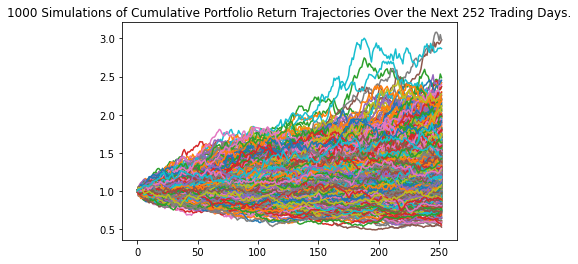

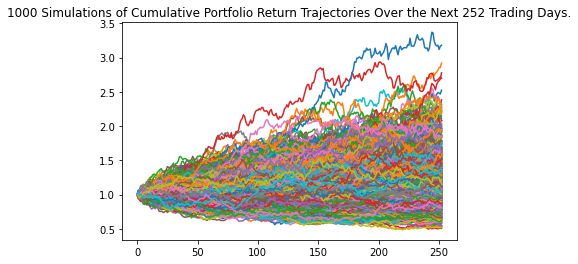

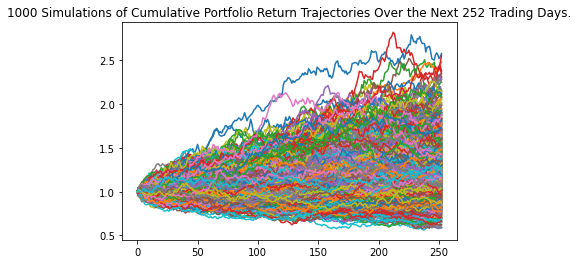

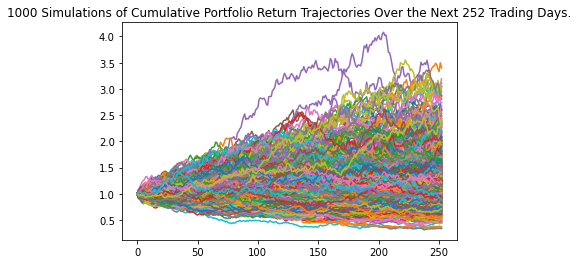

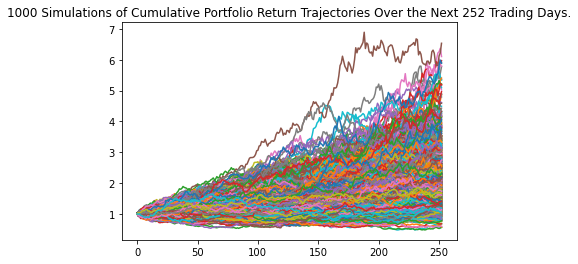

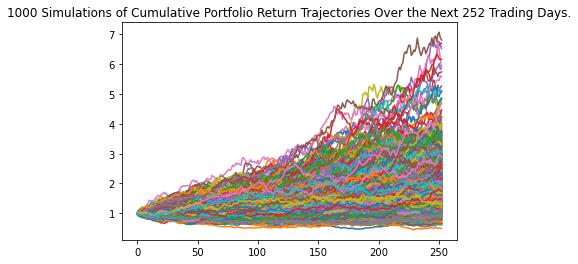

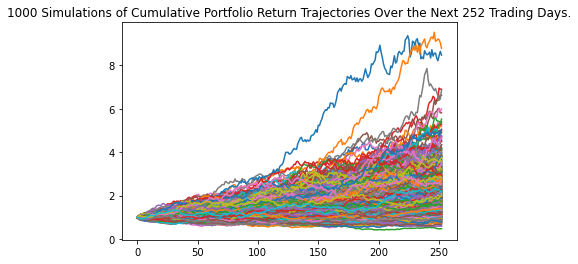

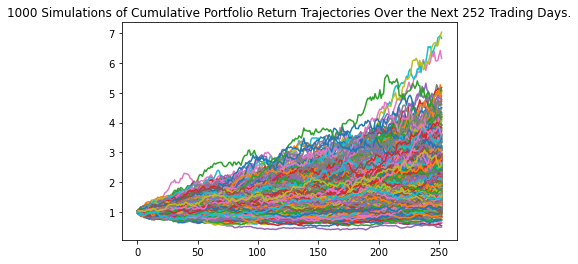

In [44]:
# Visualize the 1 yr Monte Carlo simulation by creating an overlay line plot

MC_dict = {"VOT": MC_vot, "IWS": MC_iws, "MGC": MC_mgc, "EWSC": MC_ewsc, "BTC with VOT": MC_btc_vot, "BTC with IWS": MC_btc_iws, "BTC with MGC": MC_btc_mgc, "BTC with EWSC": MC_btc_ewsc}

for ticker, MC_obj in MC_dict.items():
    print(f"Line plot for {ticker}:")
    line_plot = MC_obj.plot_simulation()

In [ ]:
# Visualize the probability distribution of the Monte Carlo simulation 
    
vot_distribution_plot = MC_vot.plot_distribution()

In [ ]:
# Visualize the probability distribution of the Monte Carlo simulation 

iws_distribution_plot = MC_iws.plot_distribution()

In [ ]:
# Visualize the probability distribution of the Monte Carlo simulation 

mgc_distribution_plot = MC_mgc.plot_distribution()

In [ ]:
# Visualize the probability distribution of the Monte Carlo simulation 

ewsc_distribution_plot = MC_ewsc.plot_distribution()

In [ ]:
# Visualize the probability distribution of the Monte Carlo simulation 

btc_vot_distribution_plot = MC_btc_vot.plot_distribution()

In [ ]:
# Visualize the probability distribution of the Monte Carlo simulation 

btc_iws_distribution_plot = MC_btc_iws.plot_distribution()

In [ ]:
# Visualize the probability distribution of the Monte Carlo simulation 

btc_mgc_distribution_plot = MC_btc_mgc.plot_distribution()

In [ ]:
# Visualize the probability distribution of the Monte Carlo simulation 

btc_ewsc_distribution_plot = MC_btc_ewsc.plot_distribution()

# SECTION III: SUMMARIZE MONTE CARLO RESULTS

In [45]:
# Generate summary statistics from the Monte Carlo simulation results

tables = summary_tables(MC_dict)

tables_dict = {"vot_table": tables[0], "iws_table": tables[1], "mgc_table": tables[2], "ewsc_table": tables[3], "btc_vot_table": tables[4], "btc_iws_table": tables[5], "btc_mgc_table": tables[6], "btc_ewsc_table": tables[7]}

Cummulative returns summary for VOT:
count           1000.000000
mean               1.309071
std                0.371304
min                0.525931
25%                1.048975
50%                1.255423
75%                1.545415
max                2.983833
95% CI Lower       0.729293
95% CI Upper       2.158088
Name: 252, dtype: float64
Cummulative returns summary for IWS:
count           1000.000000
mean               1.208810
std                0.373731
min                0.509065
25%                0.945591
50%                1.153248
75%                1.425535
max                3.178914
95% CI Lower       0.639328
95% CI Upper       2.078748
Name: 252, dtype: float64
Cummulative returns summary for MGC:
count           1000.000000
mean               1.270776
std                0.327815
min                0.585610
25%                1.035003
50%                1.231242
75%                1.454158
max                2.578832
95% CI Lower       0.730284
95% CI Upper       2.0175

In [46]:
# Establish initial investment amount

investment = 100000

In [47]:
# Summarize portfolio predictions for 100% of respective ETF. This will serve as a baseline for comparison of BTC's interaction with ETF.

ticker_dict1 = {"VOT": tables_dict.get("vot_table"), "IWS": tables_dict.get("iws_table"), "MGC": tables_dict.get("mgc_table"), "EWSC": tables_dict.get("ewsc_table")} 

for ticker, table in ticker_dict1.items():
    summary1(table, investment, ticker)

There is a 95% chance that an initial investment of $100000 in a portfolio with 100% VOT over the next
six months will end within the range of $72929.31 and $215808.83.

The average expected return for VOT in 1 year is $130907.14.
-----
There is a 95% chance that an initial investment of $100000 in a portfolio with 100% IWS over the next
six months will end within the range of $63932.84 and $207874.77.

The average expected return for IWS in 1 year is $120880.95.
-----
There is a 95% chance that an initial investment of $100000 in a portfolio with 100% MGC over the next
six months will end within the range of $73028.36 and $201759.72.

The average expected return for MGC in 1 year is $127077.63.
-----
There is a 95% chance that an initial investment of $100000 in a portfolio with 100% EWSC over the next
six months will end within the range of $58377.79 and $253412.59.

The average expected return for EWSC in 1 year is $130618.57.
-----


In [48]:
# Summarize 50/50 portfolio predictions.
    
ticker_dict2 = {"VOT": tables_dict.get("btc_vot_table"), "IWS": tables_dict.get("btc_iws_table"), "MGC": tables_dict.get("btc_mgc_table"), "EWSC": tables_dict.get("btc_ewsc_table")} 

bitcoin = "BTC"

for ticker, table in ticker_dict2.items():
    summary2(table, investment, ticker, bitcoin) 

There is a 95% chance that an initial investment of $100000 in a portfolio with 50% VOT and 50% BTC
in one year will end within the range of $85657.97 and $433591.39.

The average expected return for VOT with BTC in 1 year is $212172.9.
-----
There is a 95% chance that an initial investment of $100000 in a portfolio with 50% IWS and 50% BTC
in one year will end within the range of $84560.02 and $393858.42.

The average expected return for IWS with BTC in 1 year is $205337.71.
-----
There is a 95% chance that an initial investment of $100000 in a portfolio with 50% MGC and 50% BTC
in one year will end within the range of $91917.67 and $435159.64.

The average expected return for MGC with BTC in 1 year is $213991.69.
-----
There is a 95% chance that an initial investment of $100000 in a portfolio with 50% EWSC and 50% BTC
in one year will end within the range of $92639.8 and $421441.33.

The average expected return for EWSC with BTC in 1 year is $208868.29.
-----
